# 数据可视化
## 一、绘制二维图形
### 1. 绘制随机图形
* **导入matplotlib的pyplot库**  
* **要在jupyter notebook中显示绘制的图形，要加上"%matplotlib inline"**

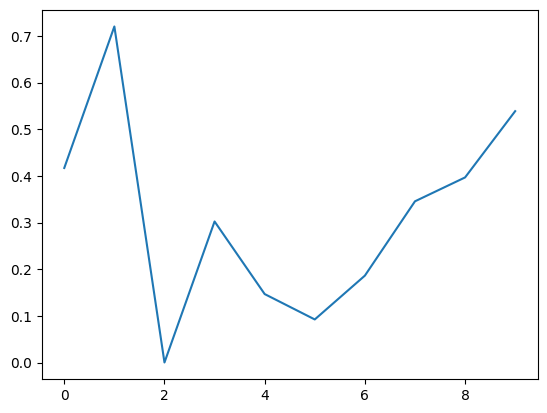

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 创建数据
np.random.seed(1) # 固定随机数
x = np.arange(10)
y = np.random.rand(10)

# 显示图形
plt.plot(x,y) # 创建折线图
plt.show() # 绘制图形

###  2. 绘制三次函数$f(x)=(x-2)x(x+2)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return (x-2)*x*(x+2)

# 给出一个离散的x值--获得对应的返回值
print(f(1))

# x为ndarray类型--一次性返回对应的各个值
print(f(np.array([1,2,3])))

-3
[-3  0 15]


#### （1）确定绘制范围
  * **arange(n1,n2,n)**:不会将n2包含在范围内
  * **linspace(n1,n2,n)**:返回n个在n1和n2之间的点
    * 可以将n2包含在内
    * 还可以利用n来控制图形中线条的粗细
  * **np,round(x,n)**:将x四舍五入为保留小数点后n位的函数

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
[-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]


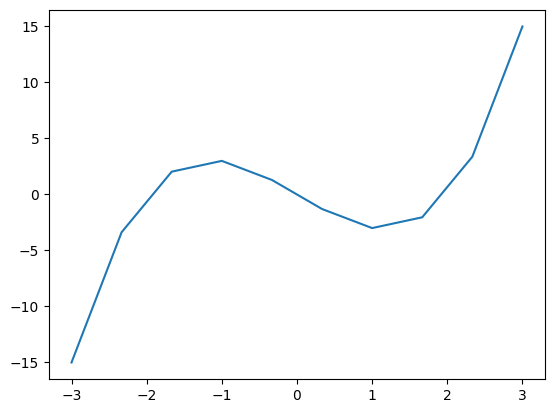

In [3]:
x = np.arange(-3,3.5,0.5) # 设为3不会将输出3对应的函数值，所以设为3.5
print(x)

x = np.linspace(-3,3,10) # 换用linspace函数
print(np.round(x,2)) # 四舍五入，保持结果整洁

plt.plot(x,f(x))
plt.show()


#### （2）装饰图形

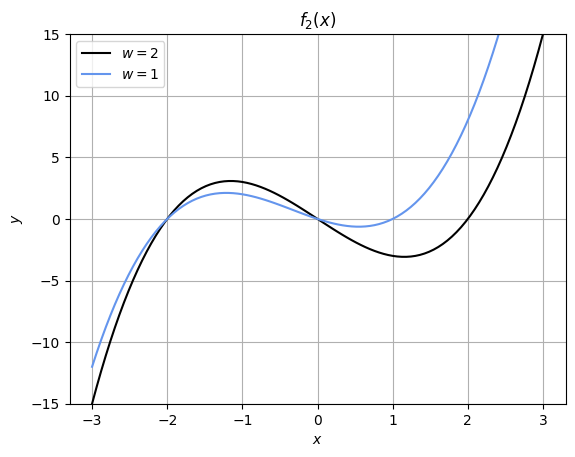

In [4]:
def f2(x,w):
    return(x-w)*x*(x+2)   # 1.函数定义

# 定义x
x = np.linspace(-3,3,100) # 2.把x分成100份

# 绘制图形
plt.plot(x,f2(x,2),color = 'black',label = '$w = 2$') # 3. 曲线1 w=2
plt.plot(x,f2(x,1),color = 'cornflowerblue',label = '$w = 1$') # 4. 曲线2 w=1
plt.legend(loc = "upper left")  # 5.显示图例
plt.ylim(-15,15)  # 6.y轴的范围
plt.title('$f_2(x)$') # 7.标题 
plt.xlabel('$x$') # 8.x标签
plt.ylabel('$y$') # 9.y标签
plt.grid(True)  # 10.网格线
plt.show()

#### （3）详解
***待补充***

#### （4）并列显示多张图片
* **plt.subplot(n1,n2,n)**:整体分成纵向n1份，横向n2份，指定在第n个区域（**n从1开始**）
* **plt.figure(figsize=(w,h))**:指定整个绘制区域的大小，宽w，高h；
  * 使用subplot并列显示时，可以通过**plot.subplots_adjust(wspace=w,hspace=h)函数**调节两个相邻区域的横纵向间隔（数值越大，间隔越大）

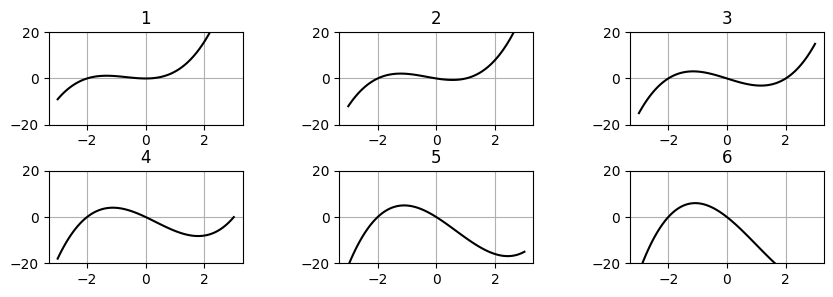

In [5]:
plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(i+1)
    plt.plot(x,f2(x,i),'k')
    plt.ylim(-20,20)
    plt.grid(True)
plt.show()

### 3. 绘制三维图形
#### （1）包含两个变量的函数
* 例如：$f(x_0,x_1)=(2x_0^{2}+x_1^{2})exp(-(2x_0^{2}+x_1^{2}))$

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
[[0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.1 0.2 0.2 0.2 0.1 0.  0. ]
 [0.  0.  0.1 0.3 0.4 0.3 0.1 0.  0. ]
 [0.  0.  0.2 0.4 0.2 0.4 0.2 0.  0. ]
 [0.  0.  0.3 0.3 0.  0.3 0.3 0.  0. ]
 [0.  0.  0.2 0.4 0.2 0.4 0.2 0.  0. ]
 [0.  0.  0.1 0.3 0.4 0.3 0.1 0.  0. ]
 [0.  0.  0.1 0.2 0.2 0.2 0.1 0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0. ]]


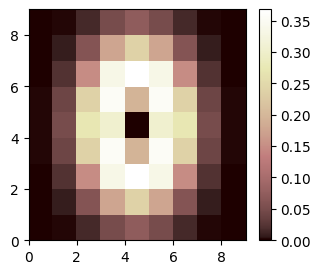

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# 定义函数f3
def f3(x0,x1):
    ans = (2*x0**2+x1**2)*np.exp(-(2*x0**2+x1**2))
    return ans

# 根据x0,x1计算f3
xn = 9
x0 = np.linspace(-2,2,xn)
x1 = np.linspace(-2,2,xn)
y = np.zeros((len(x0),len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0] = f3(x0[i0],x1[i1])

print(x0)
print(np.round(y,1))

plt.figure(figsize=(3.5,3))
# plt.gray()   # 指定用灰色色调显示图形
plt.pink()   # 粉色
# plt.jet()    # 
# plt.bone()
plt.pcolor(y)  # 显示矩阵的颜色
plt.colorbar() # 在矩阵旁边显示色阶
plt.show()

#### (2)绘制三维图形--surface

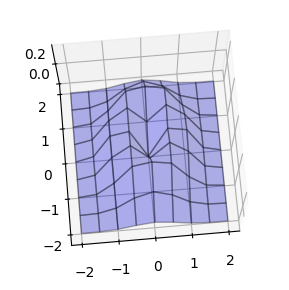

In [11]:
from mpl_toolkits.mplot3d import Axes3D

xx0,xx1 = np.meshgrid(x0,x1)

plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(xx0,xx1,y,rstride=1,cstride=1,alpha=0.3,color = 'blue',edgecolor='black')
ax.set_zticks((0,0.2))
ax.view_init(75,-95)
plt.show()

#### 这里的实现和书上的不太一致？

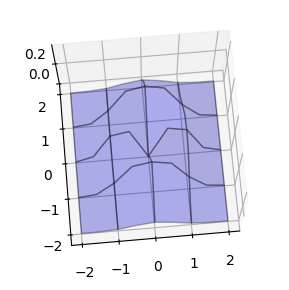

In [15]:
from mpl_toolkits.mplot3d import Axes3D

xx0,xx1 = np.meshgrid(x0,x1)

plt.figure(figsize=(5,3.5))
ax = plt.subplot(1,1,1,projection = '3d')
ax.plot_surface(xx0,xx1,y,rstride=2,cstride=2,alpha=0.3,color = 'blue',edgecolor='black')
ax.set_zticks((0,0.2))
ax.view_init(75,-95)
plt.show()

#### （3）绘制等高线--contour

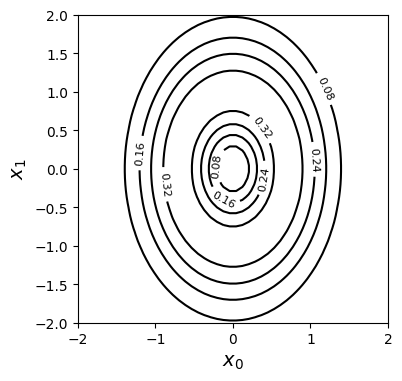

In [20]:
xn = 50
x0 = np.linspace(-2,2,xn)
x1 = np.linspace(-2,2,xn)

y = np.zeros((xn,xn))
for i0 in range(xn):
    for i1 in range(xn):
        y[i1,i0] = f3(x0[i0],x1[i1])

xx0,xx1 = np.meshgrid(x0,x1)

plt.figure(1,figsize=(4,4))
cont = plt.contour(xx0,xx1,y,5,colors = 'black')
cont.clabel(fmt = '%.2f',fontsize = 8)
plt.xlabel('$x_0$',fontsize = 14)
plt.ylabel('$x_1$',fontsize = 14)
plt.show()